# Seed

In [24]:
import torch
import random
import numpy as np

seed = 3
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Data Train

## Data Info

In [25]:
import pandas as pd

data = pd.read_csv('train.csv')
data.head()

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2
3,2859,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,...,0.000000,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,5
4,3685,33,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,0.101479,...,0.206158,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,4


In [26]:
keys1 = ['id', 'crop', 'area', '.geo']
keys2 = sorted([key for key in list(data.columns) if key not in keys1])

data = data[keys1 + keys2]
data.head()

,id,crop,area,.geo,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,3536,3,20,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,...,0.727516,0.000000,0.754859,0.000000,0.030883,0.000000,0.658016,0.126832,0.034858,0.614770
1,3739,4,45,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.000000,0.179612
2,1294,2,28,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",0.006391,0.013679,0.000000,0.007055,0.000000,0.120804,...,0.321827,0.411168,0.000000,0.357296,0.045370,0.172080,0.000000,0.090607,0.000000,0.054127
3,2859,5,19,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,...,0.000000,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
4,3685,4,33,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,...,0.833694,0.611108,0.772962,0.000000,0.080592,0.000000,0.055220,0.157676,0.022251,0.012048


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4830 non-null   int64  
 1   crop                4830 non-null   int64  
 2   area                4830 non-null   int64  
 3   .geo                4830 non-null   object 
 4   nd_mean_2021-04-15  4830 non-null   float64
 5   nd_mean_2021-04-16  4830 non-null   float64
 6   nd_mean_2021-04-18  4830 non-null   float64
 7   nd_mean_2021-04-19  4830 non-null   float64
 8   nd_mean_2021-04-20  4830 non-null   float64
 9   nd_mean_2021-04-22  4830 non-null   float64
 10  nd_mean_2021-04-23  4830 non-null   float64
 11  nd_mean_2021-04-25  4830 non-null   float64
 12  nd_mean_2021-04-26  4830 non-null   float64
 13  nd_mean_2021-04-27  4830 non-null   float64
 14  nd_mean_2021-04-28  4830 non-null   float64
 15  nd_mean_2021-04-29  4830 non-null   float64
 16  nd_mea

In [28]:
missing = data.isna().sum()
mis_per = 100 * missing / len(data)
mis_table = pd.DataFrame({"Miss count": missing, "Miss percent": mis_per}).sort_values(by = "Miss percent", ascending=False)
mis_table[mis_table['Miss count'] != 0]

,Miss count,Miss percent


In [29]:
missing = data.drop(columns=keys1).isin([0]).sum()
mis_per = 100 * missing / len(data)
mis_table = pd.DataFrame({"Miss count": missing, "Miss percent": mis_per}).sort_values(by = "Miss percent", ascending=False)
mis_table[mis_table['Miss count'] != 0]

,Miss count,Miss percent
nd_mean_2021-04-23,935,19.358178
nd_mean_2021-05-24,932,19.296066
nd_mean_2021-05-04,930,19.254658
nd_mean_2021-06-13,926,19.171843
nd_mean_2021-06-05,920,19.047619
...,...,...
nd_mean_2021-06-18,65,1.345756
nd_mean_2021-07-09,37,0.766046
nd_mean_2021-06-20,35,0.724638
nd_mean_2021-07-07,30,0.621118


## Fill Gaps

In [30]:
def find_next_neighb(array, i):
    for j in range(i + 1, len(array)):
        if array[j] != 0:
            return array[j]

def find_prev_neighb(array, i):
    for j in range(i - 1, -1, -1):
        if array[j] != 0:
            return array[j]

In [31]:
import numpy as np

def fill_gaps(data, keys):
    data_np = np.array(data[keys])
    for i, field in enumerate(data_np):
        for j, nd in enumerate(field):
            if nd == 0:
                next = find_next_neighb(field, j)
                prev = find_prev_neighb(field, j)

                if j == 0:
                    data_np[i][j] = next
                    continue

                if j == len(field) - 1:
                    data_np[i][j] = prev
                    continue

                if next == None:
                    data_np[i][j] = prev
                    continue

                if prev == None:
                    data_np[i][j] = next
                    continue

                data_np[i][j] = 0.5 * (next + prev)

    return data_np

## Unpack .geo

In [32]:
import json


def unpack_geo(data):
    geo = np.array([json.loads(son) for son in np.array(data['.geo'])])
    field_x = np.zeros(len(geo))
    field_y = np.zeros(len(geo))

    for i, field in enumerate(geo):
        center = []
        if field['type'] == 'Polygon':
            for coordinates in field['coordinates']:
                center += coordinates
            
        if field['type'] == 'MultiPolygon':
            for coordinates in field['coordinates']:
                for coord in coordinates:
                    center += coord

        if field['type'] == 'GeometryCollection':
            for element in field['geometries']:
                if element['type'] == 'LineString':
                    center += element['coordinates']

                if element['type'] == 'Polygon':
                    for coordinates in element['coordinates']:
                        center += coordinates

        center = torch.tensor(center).reshape(-1, 2).mean(dim=0)
        field_x[i] = float(center[0])
        field_y[i] = float(center[1])

    return field_x, field_y

## Data Upd

In [33]:
data[keys2] = fill_gaps(data, keys2)
data['center_x'], data['center_y'] = unpack_geo(data)

keys1 += ['center_x', 'center_y']
keys1.remove('.geo')
keys1.remove('id')
data = data[keys1 + keys2]
data.head()

,crop,area,center_x,center_y,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,3,20,42.500305,51.412819,0.187150,0.072846,0.262300,0.261778,0.063134,0.062981,...,0.727516,0.741187,0.754859,0.392871,0.030883,0.344449,0.658016,0.126832,0.034858,0.614770
1,4,45,50.265606,56.606041,0.245285,0.332928,0.349133,0.287182,0.064671,0.097138,...,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.177263,0.179612
2,2,28,38.003231,53.837181,0.006391,0.013679,0.010367,0.007055,0.063929,0.120804,...,0.321827,0.411168,0.384232,0.357296,0.045370,0.172080,0.131344,0.090607,0.072367,0.054127
3,5,19,44.727707,55.935535,0.293425,0.105976,0.318047,0.052500,0.153700,0.001917,...,0.149104,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776,0.378900
4,4,33,34.783531,52.907249,0.027983,0.130885,0.117227,0.063492,0.040565,0.024416,...,0.833694,0.611108,0.772962,0.426777,0.080592,0.067906,0.055220,0.157676,0.022251,0.012048


## Graphs

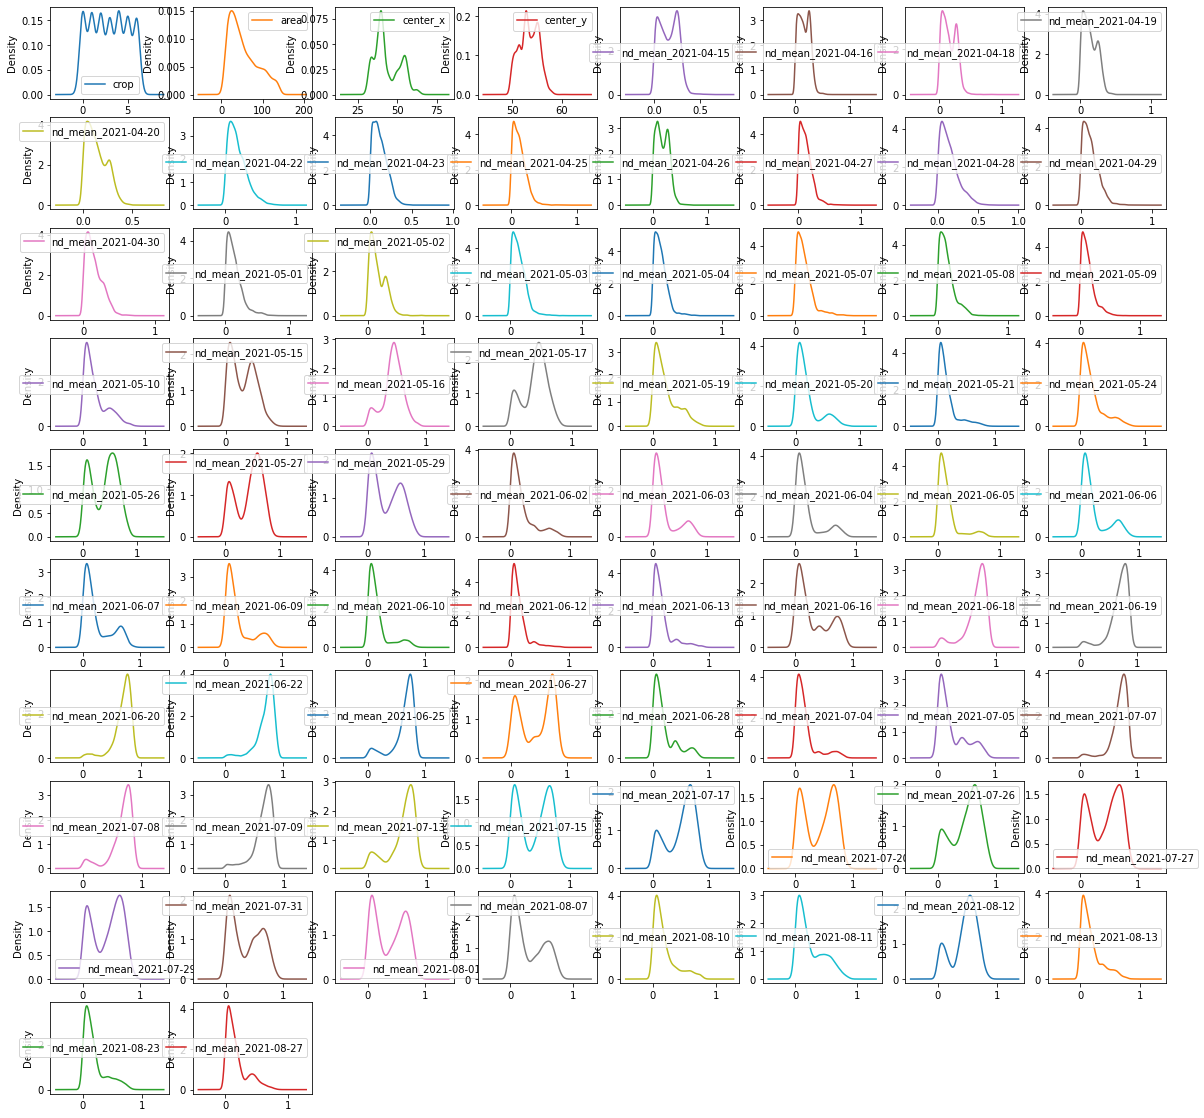

In [34]:
from matplotlib import pyplot as plt


plt.rcParams["figure.figsize"] = [20, 20]
data.plot(kind='density',layout=(10,8),  subplots=True, sharex=False)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7549660490>,
      dtype=object)

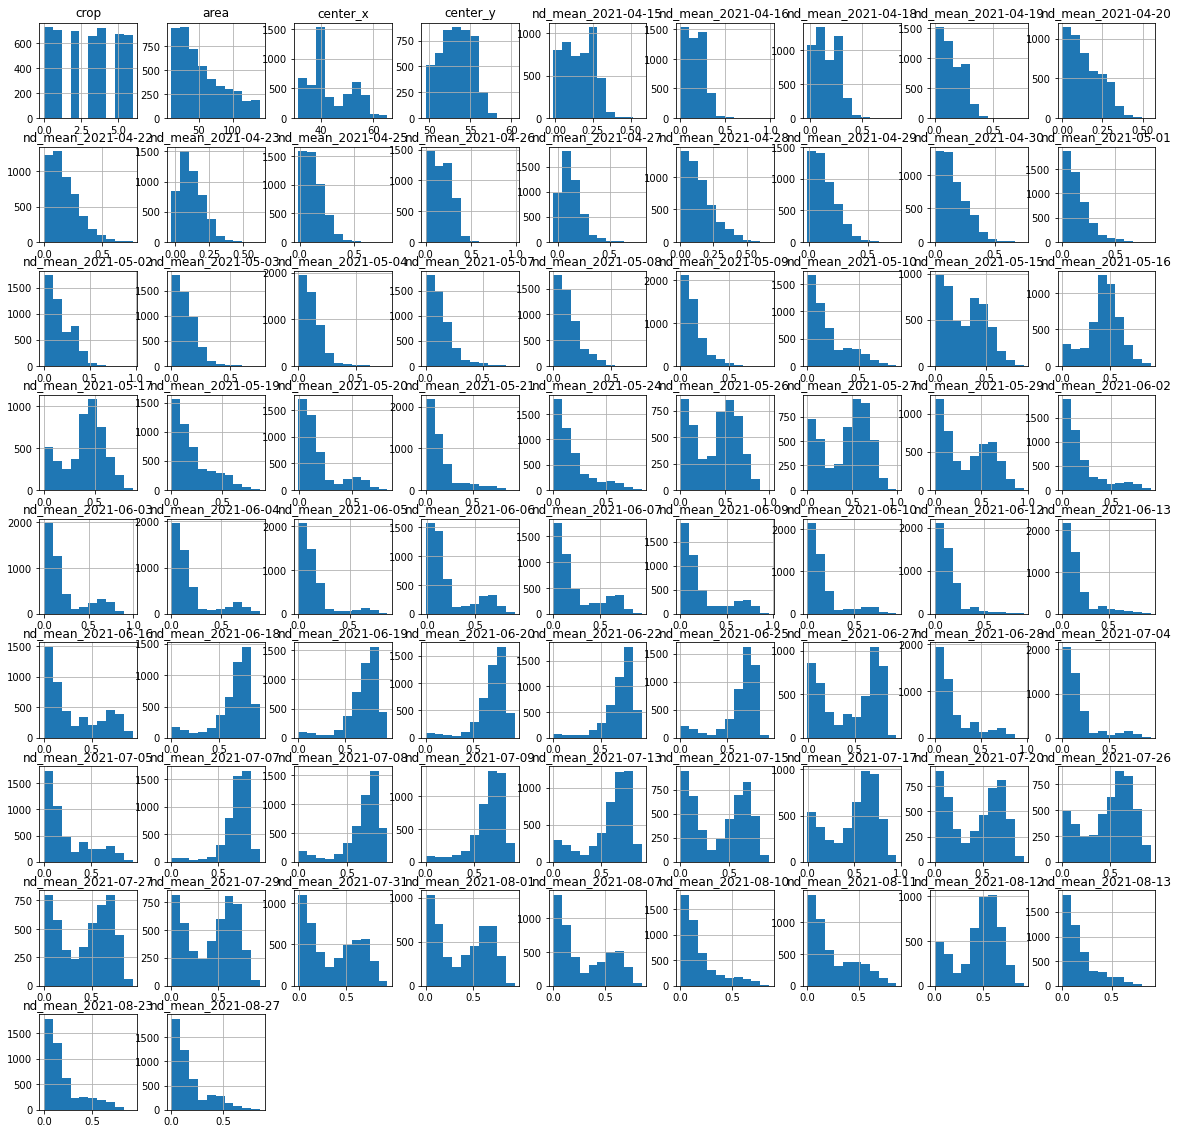

In [35]:
data.hist(bins=10)

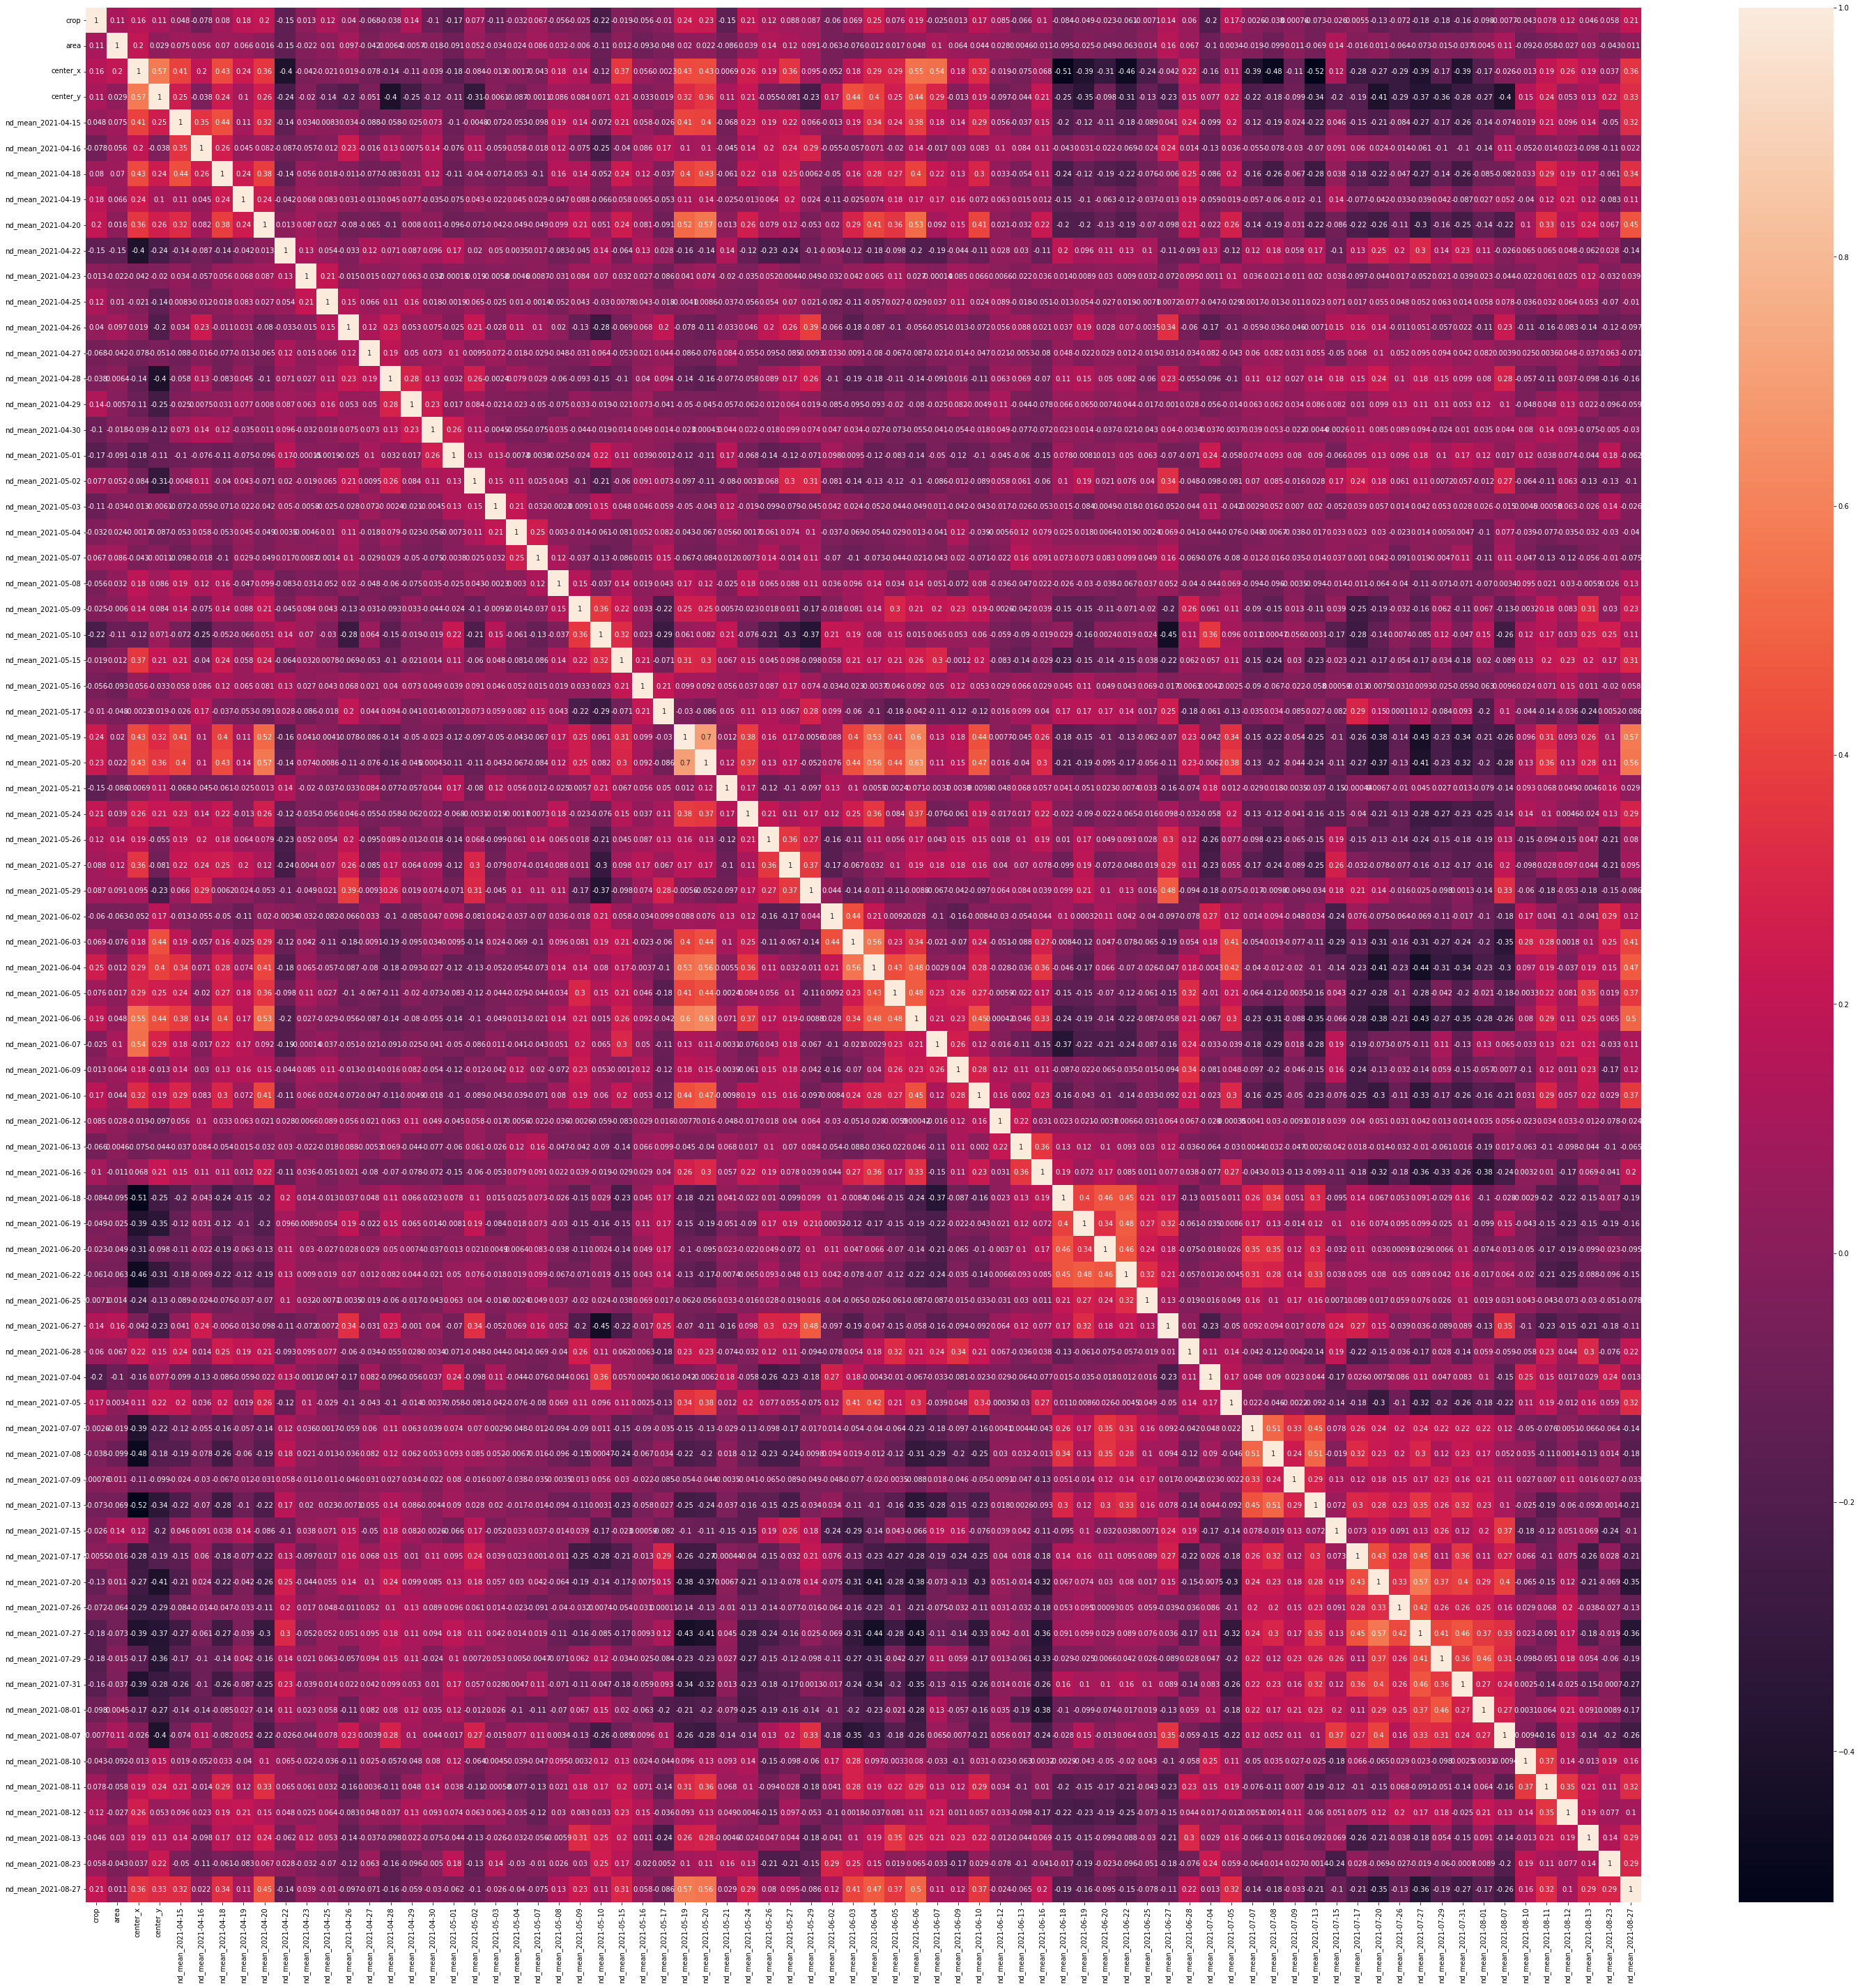

In [36]:
import seaborn as sb

plt.subplots(figsize=(50,50))
sb.heatmap(data.corr(), annot=True)

In [37]:
data[keys1].corr()['crop']

crop        1.000000
area        0.109890
center_x    0.156307
center_y    0.113025
Name: crop, dtype: float64

In [38]:
dcorr = data[keys2].corr()
for i in range(0, 11):
    print(i/10, ((dcorr > i/10).sum() > 1).sum())

0.0 70
0.1 70
0.2 68
0.3 52
0.4 30
0.5 12
0.6 3
0.7 2
0.8 0
0.9 0
1.0 0


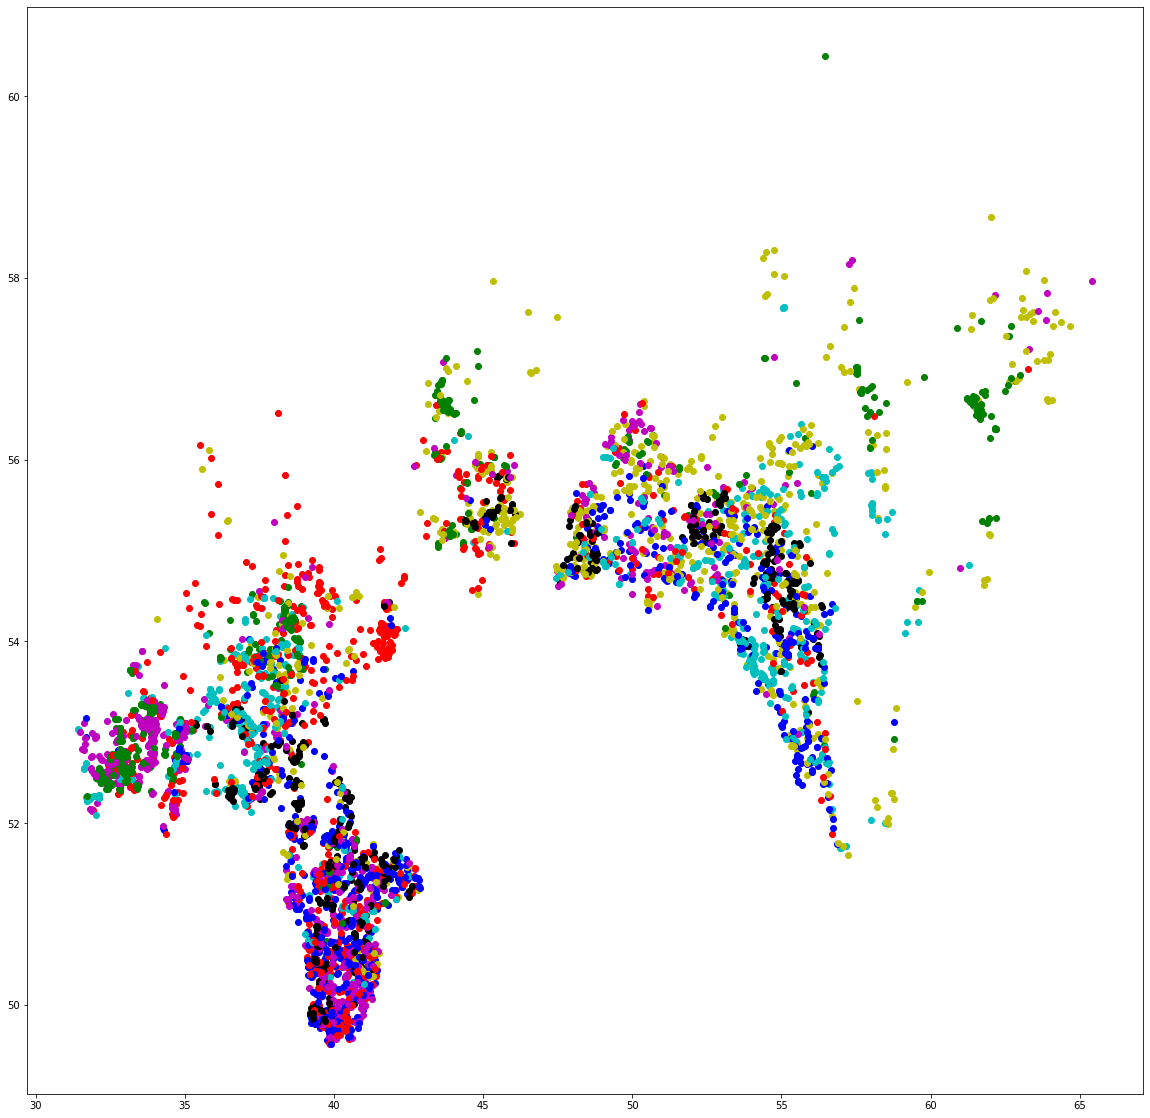

In [39]:
map = np.array(data[['crop', 'center_x', 'center_y']])
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
fig, ax = plt.subplots()
for point in map:
    ax.scatter(point[1], point[2], color=colors[int(point[0])])
plt.show()

NVDI

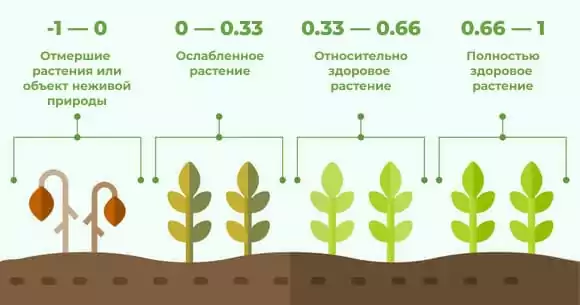

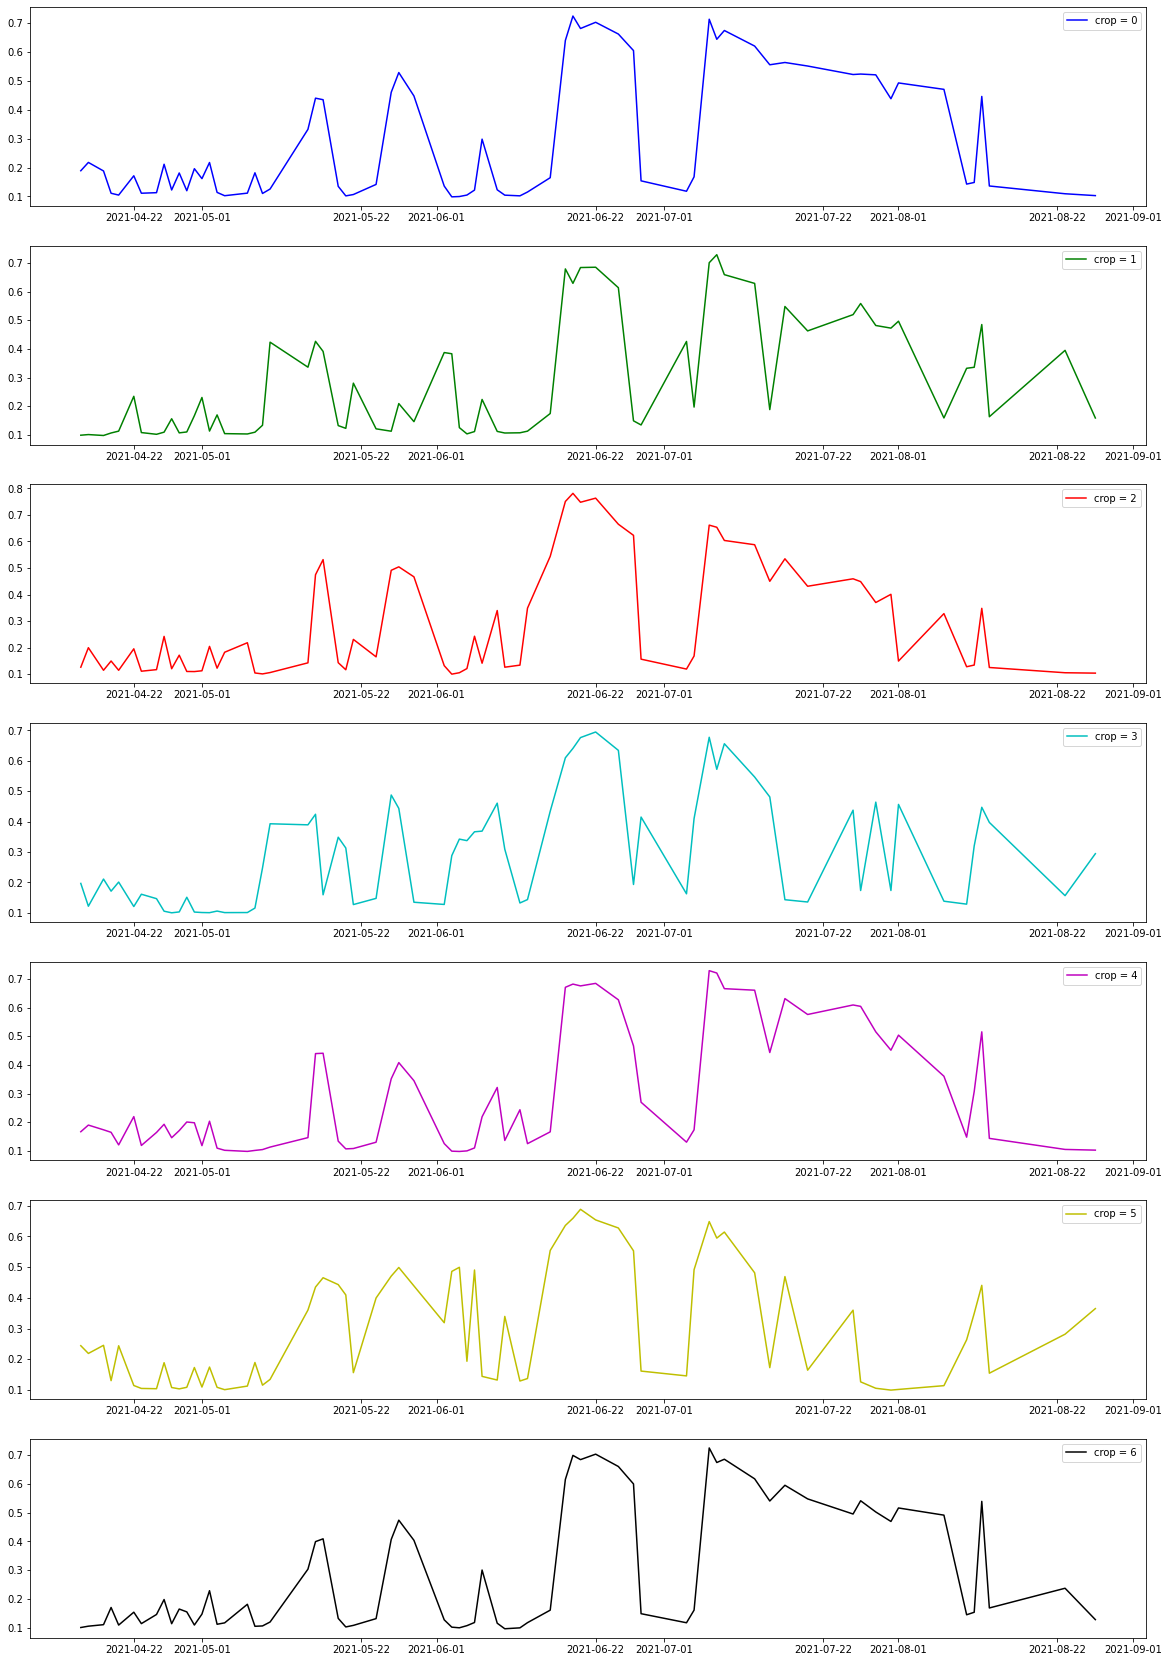

In [40]:
import datetime


fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(20, 30))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
x_name = [datetime.datetime.strptime(kys[-10:], '%Y-%m-%d') for kys in keys2]
for i, ax in enumerate(axs):
    ax.plot(x_name, np.array(data[keys2][data['crop'] == i]).mean(axis=0), label='crop = ' + str(i), color=colors[i])
    ax.legend()
plt.show()

#Data Test

In [41]:
data_test = pd.read_csv('test.csv')
keys1_ = ['id', 'area', '.geo']
data_test = data_test[keys1_+ keys2]
data_test.head()

,id,area,.geo,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,611,26,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",0.083038,0.196691,0.244827,0.000000,0.241219,0.259303,0.064947,...,0.719171,0.000000,0.593911,0.000000,0.000000,0.192016,0.164840,0.714292,0.065030,0.084197
1,6417,98,"{""type"":""Polygon"",""coordinates"":[[[39.50520518...",0.122470,0.091192,0.241003,0.000000,0.181600,0.125823,0.108175,...,0.317670,0.329803,0.000000,0.007428,0.000000,0.106484,0.167479,0.000000,0.000000,0.108945
2,3352,21,"{""type"":""Polygon"",""coordinates"":[[[39.30105409...",0.259347,0.000000,0.297489,0.033368,0.000000,0.285057,0.374026,...,0.534127,0.000000,0.549128,0.000000,0.026141,0.469352,0.477381,0.037838,0.000000,0.158279
3,4224,18,"{""type"":""Polygon"",""coordinates"":[[[33.08144648...",0.166209,0.111243,0.000000,0.201012,0.083885,0.000000,0.015033,...,0.765292,0.597874,0.681923,0.035716,0.693845,0.614671,0.634286,0.108990,0.532947,0.237742
4,3102,53,"{""type"":""Polygon"",""coordinates"":[[[45.10231339...",0.010862,0.000000,0.067479,0.234954,0.000000,0.000000,0.000000,...,0.000000,0.134136,0.780305,0.030224,0.046893,0.000000,0.779191,0.048622,0.650742,0.121296


In [42]:
data_test[keys2] = fill_gaps(data_test, keys2)
data_test['center_x'], data_test['center_y'] = unpack_geo(data_test)

keys1_ += ['center_x', 'center_y']
keys1_.remove('.geo')
keys1_.remove('id')

id = np.array(data_test['id'])
data_test = data_test[keys1_ + keys2]
data_test.head()

,area,center_x,center_y,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,26,35.974010,52.385040,0.083038,0.196691,0.244827,0.243023,0.241219,0.259303,0.064947,...,0.719171,0.656541,0.593911,0.392963,0.292490,0.192016,0.164840,0.714292,0.065030,0.084197
1,98,39.517071,52.068138,0.122470,0.091192,0.241003,0.211301,0.181600,0.125823,0.108175,...,0.317670,0.329803,0.168616,0.007428,0.056956,0.106484,0.167479,0.138212,0.123579,0.108945
2,21,39.304958,49.945820,0.259347,0.278418,0.297489,0.033368,0.159212,0.285057,0.374026,...,0.534127,0.541628,0.549128,0.287634,0.026141,0.469352,0.477381,0.037838,0.098058,0.158279
3,18,33.085629,52.550568,0.166209,0.111243,0.156128,0.201012,0.083885,0.049459,0.015033,...,0.765292,0.597874,0.681923,0.035716,0.693845,0.614671,0.634286,0.108990,0.532947,0.237742
4,53,45.110874,55.373238,0.010862,0.039170,0.067479,0.234954,0.169268,0.136426,0.120004,...,0.086601,0.134136,0.780305,0.030224,0.046893,0.413042,0.779191,0.048622,0.650742,0.121296


# Sklearn Models

## Dataset

In [43]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(np.array(data.drop(columns='crop')),
                                                      np.array(data['crop']),
                                                      test_size=0.1,
                                                      shuffle=True,
                                                      stratify=np.array(data['crop']))

## Models

In [44]:
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report


def score(model, X_valid, y_valid):
    preds = model.predict(X_valid)
    print(classification_report(y_valid, preds))
    print('recall: ', recall_score(y_valid, preds, average="macro", zero_division=0))

In [45]:
from sklearn.ensemble import RandomForestClassifier


clf1 = RandomForestClassifier(n_estimators=1024, max_depth=128, random_state=0)
clf1.fit(X_train, y_train)
score(clf1, X_valid, y_valid)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        73
           1       0.97      1.00      0.99        70
           2       0.89      0.93      0.91        70
           3       1.00      0.98      0.99        65
           4       0.93      0.88      0.90        72
           5       1.00      0.97      0.98        67
           6       0.92      0.91      0.92        66

    accuracy                           0.94       483
   macro avg       0.94      0.94      0.94       483
weighted avg       0.94      0.94      0.94       483

recall:  0.9427048321891621


In [46]:
from sklearn.ensemble import ExtraTreesClassifier


clf2 = ExtraTreesClassifier(n_estimators=512, max_depth=128, random_state=0)
clf2.fit(X_train, y_train)
score(clf2, X_valid, y_valid)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        73
           1       0.97      1.00      0.99        70
           2       0.90      0.94      0.92        70
           3       1.00      1.00      1.00        65
           4       0.95      0.86      0.91        72
           5       1.00      0.99      0.99        67
           6       0.88      0.89      0.89        66

    accuracy                           0.94       483
   macro avg       0.94      0.94      0.94       483
weighted avg       0.94      0.94      0.94       483

recall:  0.9410131234020593


In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


clf3_1 = ExtraTreesClassifier(n_estimators=512, max_depth=128, random_state=0)
clf3_2 = RandomForestClassifier(n_estimators=1024, max_depth=128, random_state=0)
clf3 = VotingClassifier(estimators=[('et', clf3_1), ('rf', clf3_2)],
                        voting='soft')
clf3.fit(X_train, y_train)
score(clf3, X_valid, y_valid)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        73
           1       0.97      1.00      0.99        70
           2       0.92      0.93      0.92        70
           3       1.00      1.00      1.00        65
           4       0.95      0.88      0.91        72
           5       1.00      0.97      0.98        67
           6       0.91      0.94      0.93        66

    accuracy                           0.95       483
   macro avg       0.95      0.95      0.95       483
weighted avg       0.95      0.95      0.95       483

recall:  0.9492316387159686


In [48]:
from sklearn.ensemble import GradientBoostingClassifier


clf4 = GradientBoostingClassifier(n_estimators=128, 
                                  learning_rate=1e-1, 
                                  max_depth=3, 
                                  random_state=0)
clf4.fit(X_train, y_train)
score(clf4, X_valid, y_valid)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        73
           1       0.99      1.00      0.99        70
           2       0.93      0.91      0.92        70
           3       1.00      0.98      0.99        65
           4       0.90      0.90      0.90        72
           5       0.99      0.99      0.99        67
           6       0.94      0.95      0.95        66

    accuracy                           0.95       483
   macro avg       0.95      0.95      0.95       483
weighted avg       0.95      0.95      0.95       483

recall:  0.9493440781615856


In [49]:
from sklearn.ensemble import HistGradientBoostingClassifier


clf5 = HistGradientBoostingClassifier(max_iter=1024, 
                                      learning_rate=1e-2, 
                                      max_depth=3, 
                                      random_state=0)
clf5.fit(X_train, y_train)
score(clf5, X_valid, y_valid)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        73
           1       0.99      1.00      0.99        70
           2       0.98      0.93      0.96        70
           3       1.00      1.00      1.00        65
           4       0.90      0.92      0.91        72
           5       1.00      1.00      1.00        67
           6       0.95      0.95      0.95        66

    accuracy                           0.96       483
   macro avg       0.96      0.96      0.96       483
weighted avg       0.96      0.96      0.96       483

recall:  0.9596559669945189


In [50]:
import xgboost


clf6 = xgboost.XGBClassifier()
clf6.fit(X_train, y_train)
score(clf6, X_valid, y_valid)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        73
           1       0.97      1.00      0.99        70
           2       0.93      0.91      0.92        70
           3       1.00      0.98      0.99        65
           4       0.91      0.86      0.89        72
           5       0.96      1.00      0.98        67
           6       0.95      0.92      0.94        66

    accuracy                           0.94       483
   macro avg       0.94      0.94      0.94       483
weighted avg       0.94      0.94      0.94       483

recall:  0.9411948890422471


In [ ]:
!pip install catboost

In [52]:
import catboost


clf7 = catboost.CatBoostClassifier()
clf7.fit(X_train, y_train)
score(clf7, X_valid, y_valid)

Learning rate set to 0.085285
0:	learn: 1.7908688	total: 123ms	remaining: 2m 3s
1:	learn: 1.6585990	total: 222ms	remaining: 1m 50s
2:	learn: 1.5431975	total: 312ms	remaining: 1m 43s
3:	learn: 1.4567580	total: 409ms	remaining: 1m 41s
4:	learn: 1.3770812	total: 504ms	remaining: 1m 40s
5:	learn: 1.3041978	total: 598ms	remaining: 1m 39s
6:	learn: 1.2415314	total: 710ms	remaining: 1m 40s
7:	learn: 1.1809173	total: 808ms	remaining: 1m 40s
8:	learn: 1.1320773	total: 897ms	remaining: 1m 38s
9:	learn: 1.0879403	total: 1.1s	remaining: 1m 48s
10:	learn: 1.0410641	total: 1.25s	remaining: 1m 51s
11:	learn: 0.9988213	total: 1.35s	remaining: 1m 50s
12:	learn: 0.9669947	total: 1.44s	remaining: 1m 49s
13:	learn: 0.9312462	total: 1.53s	remaining: 1m 47s
14:	learn: 0.8979135	total: 1.63s	remaining: 1m 46s
15:	learn: 0.8678772	total: 1.74s	remaining: 1m 47s
16:	learn: 0.8419059	total: 1.83s	remaining: 1m 45s
17:	learn: 0.8132705	total: 1.93s	remaining: 1m 45s
18:	learn: 0.7909856	total: 2.02s	remaining: 1

In [53]:
import lightgbm


clf8 = lightgbm.LGBMClassifier()
clf8.fit(X_train, y_train)
score(clf8, X_valid, y_valid)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        73
           1       0.99      1.00      0.99        70
           2       0.96      0.91      0.93        70
           3       1.00      0.98      0.99        65
           4       0.89      0.93      0.91        72
           5       0.99      1.00      0.99        67
           6       0.94      0.88      0.91        66

    accuracy                           0.94       483
   macro avg       0.94      0.94      0.94       483
weighted avg       0.94      0.94      0.94       483

recall:  0.9426650703069489


In [54]:
clf9_1 = GradientBoostingClassifier(n_estimators=128, 
                                    learning_rate=1e-1, 
                                    max_depth=3, 
                                    random_state=0)

clf9_2 = HistGradientBoostingClassifier(max_iter=1024, 
                                        learning_rate=1e-2, 
                                        max_depth=3, 
                                       random_state=0)

clf9_3 = xgboost.XGBClassifier()
clf9_4 = lightgbm.LGBMClassifier()
clf9_5 = catboost.CatBoostClassifier()
clf9_6 = RandomForestClassifier(n_estimators=1024, max_depth=128, random_state=0)
clf9_7 = ExtraTreesClassifier(n_estimators=512, max_depth=128, random_state=0)

clf9 = VotingClassifier(estimators=[('GBC', clf9_1), 
                                    ('HGB', clf9_2),
                                    ('XGB', clf9_3),
                                    ('LGB', clf9_4),
                                    ('CBC', clf9_5),
                                    ('RFC', clf9_6),
                                    ('ETC', clf9_7),],
                        voting='soft')
clf9.fit(X_train, y_train)
score(clf9, X_valid, y_valid)

Learning rate set to 0.085285
0:	learn: 1.7908688	total: 134ms	remaining: 2m 13s
1:	learn: 1.6585990	total: 231ms	remaining: 1m 55s
2:	learn: 1.5431975	total: 319ms	remaining: 1m 46s
3:	learn: 1.4567580	total: 409ms	remaining: 1m 41s
4:	learn: 1.3770812	total: 504ms	remaining: 1m 40s
5:	learn: 1.3041978	total: 597ms	remaining: 1m 38s
6:	learn: 1.2415314	total: 695ms	remaining: 1m 38s
7:	learn: 1.1809173	total: 797ms	remaining: 1m 38s
8:	learn: 1.1320773	total: 884ms	remaining: 1m 37s
9:	learn: 1.0879403	total: 974ms	remaining: 1m 36s
10:	learn: 1.0410641	total: 1.07s	remaining: 1m 36s
11:	learn: 0.9988213	total: 1.17s	remaining: 1m 36s
12:	learn: 0.9669947	total: 1.26s	remaining: 1m 35s
13:	learn: 0.9312462	total: 1.35s	remaining: 1m 35s
14:	learn: 0.8979135	total: 1.45s	remaining: 1m 35s
15:	learn: 0.8678772	total: 1.55s	remaining: 1m 35s
16:	learn: 0.8419059	total: 1.64s	remaining: 1m 34s
17:	learn: 0.8132705	total: 1.73s	remaining: 1m 34s
18:	learn: 0.7909856	total: 1.82s	remaining:

## Save

In [55]:
#import pickle

#pickle.dump(clf1, open('vote', 'wb'))

# Network Models

## Dataset

In [56]:
class Dataset():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

    def __len__(self):
        return len(self.X)

In [57]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split


X_train_torch = torch.FloatTensor(X_train)
X_valid_torch = torch.FloatTensor(X_valid)
y_train_torch = torch.LongTensor(y_train)
y_valid_torch = torch.LongTensor(y_valid)

batch_size = 128

train_loader = DataLoader(Dataset(X_train_torch, y_train_torch), 
                          batch_size = batch_size,
                          shuffle=True,
                          num_workers=2)

valid_loader = DataLoader(Dataset(X_valid_torch, y_valid_torch), 
                          batch_size = batch_size,
                          shuffle=True,
                          num_workers=2)

## Train Functions

In [58]:
def train(net, train_loader, test_loader, nepoch=10):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    #optimizer = torch.optim.Adam(net.parameters(), amsgrad=True, lr=1e-3, weight_decay=1e-5)
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-3, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    loss_hist = {'test': [], 'train': []}
    accy_hist = {'test': [], 'train': []}

    print('{:<7s}|{:^20s}|{:^20s}|'.format('', 'Train', 'Test'))
    print('{:<7s}|{:>10s}{:>10s}|{:>10s}{:>10s}|'.format('Epoch', 'Loss', 'Acc', 'Loss', 'Acc'))
    print('-' * 50)

    for epoch in range(nepoch):
        for phase in ['train', 'test']:
            if phase == 'train':
                dataloader = train_loader
                scheduler.step()
                net.train()
            else:
                dataloader = test_loader
                net.eval()
            
            epoch_loss = 0
            epoch_accy = 0

            for X_batch, y_batch in dataloader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                optimizer.zero_grad()
                preds = net(X_batch)
                loss_val = loss(preds, y_batch)
                
                if phase == 'train':
                    loss_val.backward()
                    optimizer.step()
                
                preds = preds.argmax(dim=1)

                epoch_loss += loss_val.item()
                epoch_accy += (preds == y_batch.data).float().mean().data.cpu().numpy()

            epoch_loss /= len(dataloader)
            epoch_accy /= len(dataloader)

            if phase == 'train':
                print('{:>3d}/{:>3d}|{:>10.4f}{:>10.4f}|'.format(epoch + 1, nepoch, epoch_loss, epoch_accy), end='')
            else:
                print('{:>10.4f}{:>10.4f}|'.format(epoch_loss, epoch_accy))

            loss_hist[phase].append(epoch_loss)
            accy_hist[phase].append(epoch_accy)

    hist = {'loss': loss_hist, 'accy': accy_hist}
    print('-' * 50)
    return net, hist

In [59]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def report(net, stats, test_loader):
    net = net.cpu()
    test = []
    preds = []

    for X_batch, y_batch in test_loader:
        preds += list(net.forward(X_batch).argmax(dim=1).detach().numpy())
        test += list(y_batch.detach().numpy())
    
    report = classification_report(test, preds)
    print(report)
    print('recall: ', recall_score(test, preds, average="macro", zero_division=0))
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    
    ax1.plot(stats['accy']['train'], label='Train Accuracy')
    ax1.plot(stats['accy']['test'], label='Test Accuracy')
    ax1.legend()
    
    ax2.plot(stats['loss']['train'], label='Train Loss')
    ax2.plot(stats['loss']['test'], label='Test Loss')
    ax2.legend()

## Network

### AgricultureNet1

       |       Train        |        Test        |
Epoch  |      Loss       Acc|      Loss       Acc|
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  1/ 30|    0.6638    0.8020|    0.3772    0.9028|
  2/ 30|    0.2481    0.9165|    0.2477    0.9243|
  3/ 30|    0.1970    0.9299|    0.2309    0.9204|
  4/ 30|    0.1711    0.9409|    0.2307    0.9173|
  5/ 30|    0.1520    0.9439|    0.2343    0.9175|
  6/ 30|    0.1380    0.9544|    0.2249    0.9198|
  7/ 30|    0.1097    0.9648|    0.2232    0.9167|
  8/ 30|    0.1093    0.9662|    0.2201    0.9204|
  9/ 30|    0.1080    0.9662|    0.2239    0.9173|
 10/ 30|    0.1080    0.9669|    0.2210    0.9229|
 11/ 30|    0.1064    0.9676|    0.2252    0.9162|
 12/ 30|    0.1041    0.9687|    0.2202    0.9190|
 13/ 30|    0.1011    0.9710|    0.2147    0.9233|
 14/ 30|    0.1028    0.9701|    0.2260    0.9148|
 15/ 30|    0.0993    0.9726|    0.2214    0.9148|
 16/ 30|    0.1013    0.9664|    0.2185    0.9165|
 17/ 30|    0.1015    0.9706|    0.2280    0.9150|
 18/ 30|    0.1001    0.9662|    0.2153    0.9188|
 19/ 30|    0.1012    0.9726|    0.2214    0.9173|
 20/ 30|    0.1044    0.9678|  

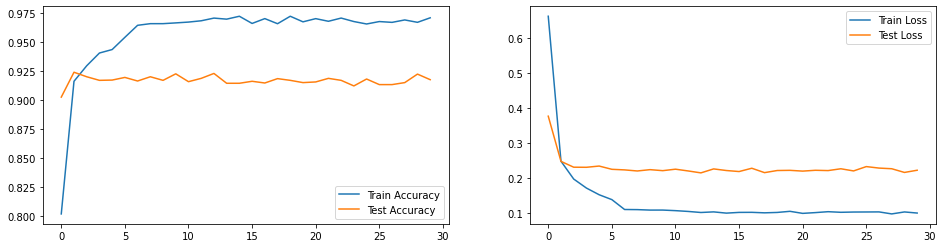

In [60]:
class AgricultureNet1(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(AgricultureNet1, self).__init__()

        self.bn0 = torch.nn.BatchNorm1d(73)

        self.fc1 = torch.nn.Linear(73, n_hidden_neurons)
        self.act1 = torch.nn.ReLU()
        self.bn1 = torch.nn.BatchNorm1d(n_hidden_neurons)
        self.dp1 = torch.nn.Dropout(p=0.50)

        self.fc2 = torch.nn.Linear(n_hidden_neurons, 7)
        
    
    def forward(self, x):
        x = self.bn0(x)

        x = self.fc1(x)
        x = self.act1(x)
        #x = self.bn1(x)
        x = self.dp1(x)
        
        x = self.fc2(x)
        return x

net1, stats = train(AgricultureNet1(2048), train_loader, valid_loader, nepoch=30)
report(net1, stats, valid_loader)

### AgricultureNet3

       |       Train        |        Test        |
Epoch  |      Loss       Acc|      Loss       Acc|
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  1/ 20|    0.4902    0.8286|    0.3017    0.9033|
  2/ 20|    0.1955    0.9326|    0.2235    0.9232|
  3/ 20|    0.1399    0.9528|    0.2304    0.9189|
  4/ 20|    0.1026    0.9685|    0.2429    0.9187|
  5/ 20|    0.0845    0.9738|    0.2771    0.9097|
  6/ 20|    0.0715    0.9756|    0.2901    0.9198|
  7/ 20|    0.0421    0.9871|    0.2627    0.9204|
  8/ 20|    0.0344    0.9917|    0.2435    0.9223|
  9/ 20|    0.0288    0.9940|    0.2495    0.9245|
 10/ 20|    0.0265    0.9952|    0.2612    0.9209|
 11/ 20|    0.0282    0.9929|    0.2466    0.9302|
 12/ 20|    0.0225    0.9963|    0.2516    0.9251|
 13/ 20|    0.0214    0.9963|    0.2446    0.9243|
 14/ 20|    0.0215    0.9949|    0.2515    0.9237|
 15/ 20|    0.0206    0.9963|    0.2482    0.9251|
 16/ 20|    0.0217    0.9968|    0.2394    0.9299|
 17/ 20|    0.0204    0.9966|    0.2520    0.9220|
 18/ 20|    0.0212    0.9961|    0.2462    0.9296|
 19/ 20|    0.0226    0.9966|    0.2484    0.9268|
 20/ 20|    0.0229    0.9952|  

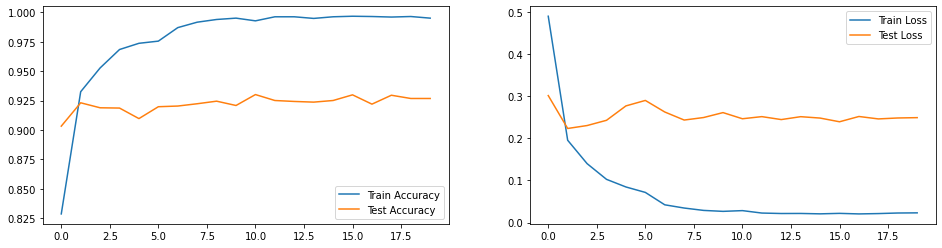

In [61]:
class AgricultureNet3(torch.nn.Module):
    def __init__(self):
        super(AgricultureNet3, self).__init__()

        self.bn0 = torch.nn.BatchNorm1d(73)

        self.fc1 = torch.nn.Linear(73, 512)
        self.act1 = torch.nn.ReLU()
        self.bn1 = torch.nn.BatchNorm1d(512)
        self.dp1 = torch.nn.Dropout(p=0.10)
        
        self.fc2 = torch.nn.Linear(512, 1024)
        self.act2 = torch.nn.ReLU()
        self.bn2 = torch.nn.BatchNorm1d(1024)
        self.dp2 = torch.nn.Dropout(p=0.25)

        self.fc3 = torch.nn.Linear(1024, 256)
        self.act3 = torch.nn.ReLU()
        self.bn3 = torch.nn.BatchNorm1d(256)
        self.dp3 = torch.nn.Dropout(p=0.50)

        self.fc4 = torch.nn.Linear(256, 7)
        
    
    def forward(self, x):
        x = self.bn0(x)

        x = self.fc1(x)
        x = self.act1(x)
        x = self.bn1(x)
        x = self.dp1(x)
        
        x = self.fc2(x)
        x = self.act2(x)
        x = self.bn2(x)
        x = self.dp2(x)

        x = self.fc3(x)
        x = self.act3(x)
        x = self.bn3(x)
        x = self.dp3(x)

        x = self.fc4(x)
        return x

net3, stats = train(AgricultureNet3(), train_loader, valid_loader, nepoch=20)
report(net3, stats, valid_loader)

### AgricultureNet5

In [62]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split



X_train_torch_conv = torch.FloatTensor(X_train).reshape(len(X_train), 1, -1)
X_valid_torch_conv = torch.FloatTensor(X_valid).reshape(len(X_valid), 1, -1)

batch_size = 128

train_loader_conv = DataLoader(Dataset(X_train_torch_conv, y_train_torch), 
                               batch_size = batch_size,
                               shuffle=True,
                               num_workers=2)

valid_loader_conv = DataLoader(Dataset(X_valid_torch_conv, y_valid_torch), 
                               batch_size = batch_size,
                               shuffle=True,
                               num_workers=2)

       |       Train        |        Test        |
Epoch  |      Loss       Acc|      Loss       Acc|
--------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  1/ 50|    0.9964    0.6388|    2.1398    0.2031|
  2/ 50|    0.5283    0.8307|    0.6801    0.7650|
  3/ 50|    0.3734    0.8841|    0.3419    0.8686|
  4/ 50|    0.3027    0.9009|    0.3562    0.8849|
  5/ 50|    0.2853    0.9052|    0.2976    0.9067|
  6/ 50|    0.2424    0.9243|    0.7002    0.8223|
  7/ 50|    0.2057    0.9326|    0.5105    0.9167|
  8/ 50|    0.1804    0.9457|    0.4142    0.9136|
  9/ 50|    0.1657    0.9485|    0.4492    0.9232|
 10/ 50|    0.1672    0.9485|    0.4338    0.9162|
 11/ 50|    0.1546    0.9544|    0.4641    0.9156|
 12/ 50|    0.1406    0.9570|    0.4937    0.9165|
 13/ 50|    0.1420    0.9563|    0.5746    0.9218|
 14/ 50|    0.1365    0.9595|    0.4400    0.9198|
 15/ 50|    0.1329    0.9616|    0.4877    0.9223|
 16/ 50|    0.1337    0.9609|    0.3973    0.9175|
 17/ 50|    0.1311    0.9630|    0.4862    0.9150|
 18/ 50|    0.1307    0.9625|    0.5357    0.9167|
 19/ 50|    0.1208    0.9664|    0.3682    0.9201|
 20/ 50|    0.1229    0.9681|  

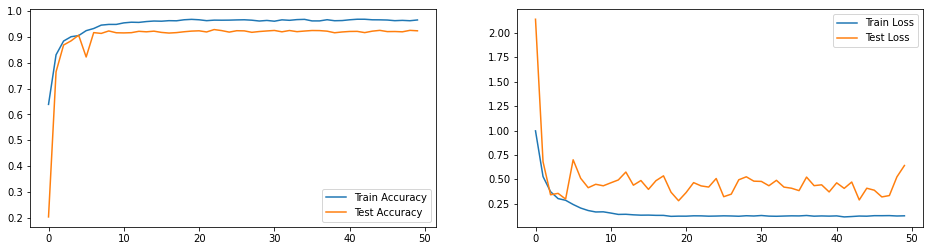

In [63]:
class AgricultureNet5(torch.nn.Module):
    def __init__(self):
        super(AgricultureNet5, self).__init__()

        self.bn0 = torch.nn.BatchNorm1d(num_features=1)
        self.conv1 = torch.nn.Conv1d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.act1 = torch.nn.ReLU()
        self.bn1 =  torch.nn.BatchNorm1d(num_features=64)
        self.pool1 = torch.nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.act2 = torch.nn.ReLU()
        self.bn2 =  torch.nn.BatchNorm1d(num_features=128)
        self.pool2 = torch.nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv3 = torch.nn.Conv1d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.act3 = torch.nn.ReLU()
        self.bn3 =  torch.nn.BatchNorm1d(num_features=256)
        self.dp1 = torch.nn.Dropout(p=0.25)

        self.fc1 = torch.nn.Linear(18 * 256, 256)
        self.act4 = torch.nn.ReLU()
        self.bn4 = torch.nn.BatchNorm1d(256)

        self.fc2 = torch.nn.Linear(256, 64)
        self.act5 = torch.nn.ReLU()
        self.bn5 = torch.nn.BatchNorm1d(64)
        self.dp2 = torch.nn.Dropout(p=0.50)

        self.fc3 = torch.nn.Linear(64, 7)
        
    
    def forward(self, x):
        x = self.bn0(x)
        x = self.conv1(x)
        x = self.act1(x)
        x = self.bn1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.bn2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.act3(x)
        x = self.bn3(x)
        x = self.dp1(x)

        x = x.view(x.size(0), x.size(1) * x.size(2))
        x = self.fc1(x)
        x = self.act4(x)
        x = self.bn4(x)

        x = self.fc2(x)
        x = self.act5(x)
        x = self.bn5(x)
        x = self.dp2(x)

        x = self.fc3(x)
        return x

net5, stats = train(AgricultureNet5(), train_loader_conv, valid_loader_conv, nepoch=50)
report(net5, stats, valid_loader_conv)

## Results

In [64]:
#max(stats['accy']['test']), stats['accy']['test'].index(max(stats['accy']['test'])) + 1

In [65]:
#from sklearn.metrics import recall_score, precision_score

#net1.eval()
#preds = net1(X_valid_torch).argmax(dim=1)
#recall_score(y_valid_torch, preds, average="macro", zero_division=0)

## Save

In [66]:
#torch.save(net1, 'AgricultureNet.pth')

# Test

In [67]:
preds = dict()

X_test = np.array(data_test)
clfs = [clf1, clf2, clf4, clf5, clf6, clf7, clf8]
for i, clf in enumerate(clfs):
    preds['model' + str(i)] = clf.predict(X_test)
preds['model5'] = torch.tensor(preds['model5']).reshape(-1)

X_test = torch.FloatTensor(np.array(data_test))
nets = [net1, net3]
for i, net in enumerate(nets):
    preds['net' + str(i)] = net(X_test).argmax(dim=1)

X_test = torch.FloatTensor(np.array(data_test)).reshape(len(data_test), 1, -1)
preds['net' + str(4)] = net5(X_test).argmax(dim=1)

preds = np.array(pd.DataFrame(preds))
preds_f = [np.argmax(np.bincount(pred)) for pred in preds]
result = pd.DataFrame({'id': id, 'crop': preds_f})
result.to_csv('solution.csv', index=False)
result

,id,crop
0,611,3
1,6417,2
2,3352,3
3,4224,1
4,3102,6
...,...,...
2066,1743,5
2067,3968,3
2068,3809,2
2069,5485,6


In [68]:
#X_test = np.array(data_test)
#preds = clf5.predict(X_test)
#result = pd.DataFrame({'id': id, 'crop': preds})
#result.to_csv('solution.csv', index=False)
#result

In [69]:
#X_test = torch.FloatTensor(np.array(data_test))
#preds = net1(X_test).argmax(dim=1)
#result = pd.DataFrame({'id': id, 'crop': preds})
#result.to_csv('solution.csv', index=False)
#result

In [70]:
#X_test = torch.FloatTensor(np.array(data_test)).reshape(2071, 1, -1)
#preds = net5(X_test).argmax(dim=1)
#result = pd.DataFrame({'id': id, 'crop': preds})
#result.to_csv('solution.csv', index=False)
#result